# **Important Modules**

In [1]:
import pandas as pd
import numpy as np
import warnings
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings('ignore')

# **EDA**

In [2]:
# Read dataset
train_df = pd.read_csv("/kaggle/input/employee-attrition-dataset/train.csv", index_col=0)
test_df = pd.read_csv("/kaggle/input/employee-attrition-dataset/test.csv", index_col=0)
df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

# Reset index
df = df.reset_index(drop=True)
df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [3]:
# Information about Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       74498 non-null  int64 
 1   Gender                    74498 non-null  object
 2   Years at Company          74498 non-null  int64 
 3   Job Role                  74498 non-null  object
 4   Monthly Income            74498 non-null  int64 
 5   Work-Life Balance         74498 non-null  object
 6   Job Satisfaction          74498 non-null  object
 7   Performance Rating        74498 non-null  object
 8   Number of Promotions      74498 non-null  int64 
 9   Overtime                  74498 non-null  object
 10  Distance from Home        74498 non-null  int64 
 11  Education Level           74498 non-null  object
 12  Marital Status            74498 non-null  object
 13  Number of Dependents      74498 non-null  int64 
 14  Job Level             

In [4]:
# Check for missing values
df.isna().sum()

Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [5]:
# Chech for duplication
df.duplicated().sum()

0

In [6]:
# Show statistcical information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,74498.0,38.529746,12.083456,18.0,28.0,39.0,49.0,59.0
Years at Company,74498.0,15.721603,11.223744,1.0,7.0,13.0,23.0,51.0
Monthly Income,74498.0,7299.379514,2152.508566,1226.0,5652.0,7348.0,8876.0,16149.0
Number of Promotions,74498.0,0.832935,0.995289,0.0,0.0,1.0,2.0,4.0
Distance from Home,74498.0,49.991584,28.513611,1.0,25.0,50.0,75.0,99.0
Number of Dependents,74498.0,1.650326,1.553633,0.0,0.0,1.0,3.0,6.0
Company Tenure,74498.0,55.727456,25.399349,2.0,36.0,56.0,76.0,128.0


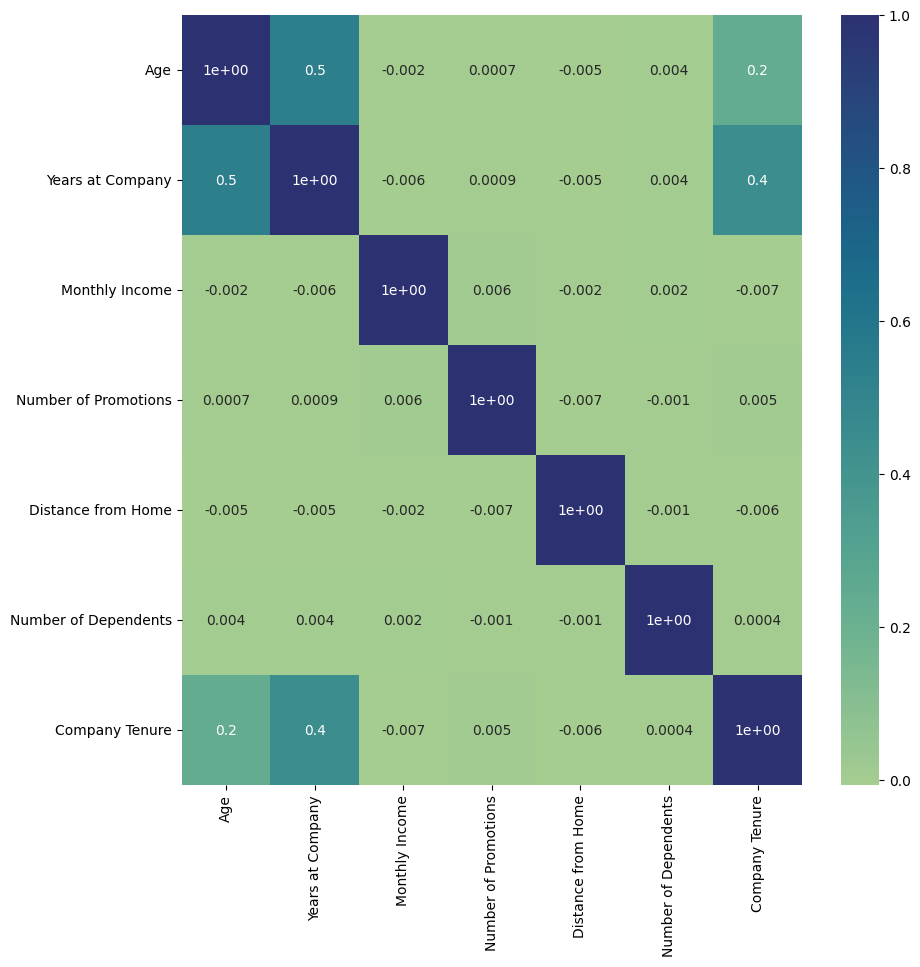

In [7]:
# Correlation
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.1', cmap="crest")
plt.show()

In [8]:
# Select numeric columns
num_cols=train_df.select_dtypes(exclude='object').columns
len(num_cols)

7

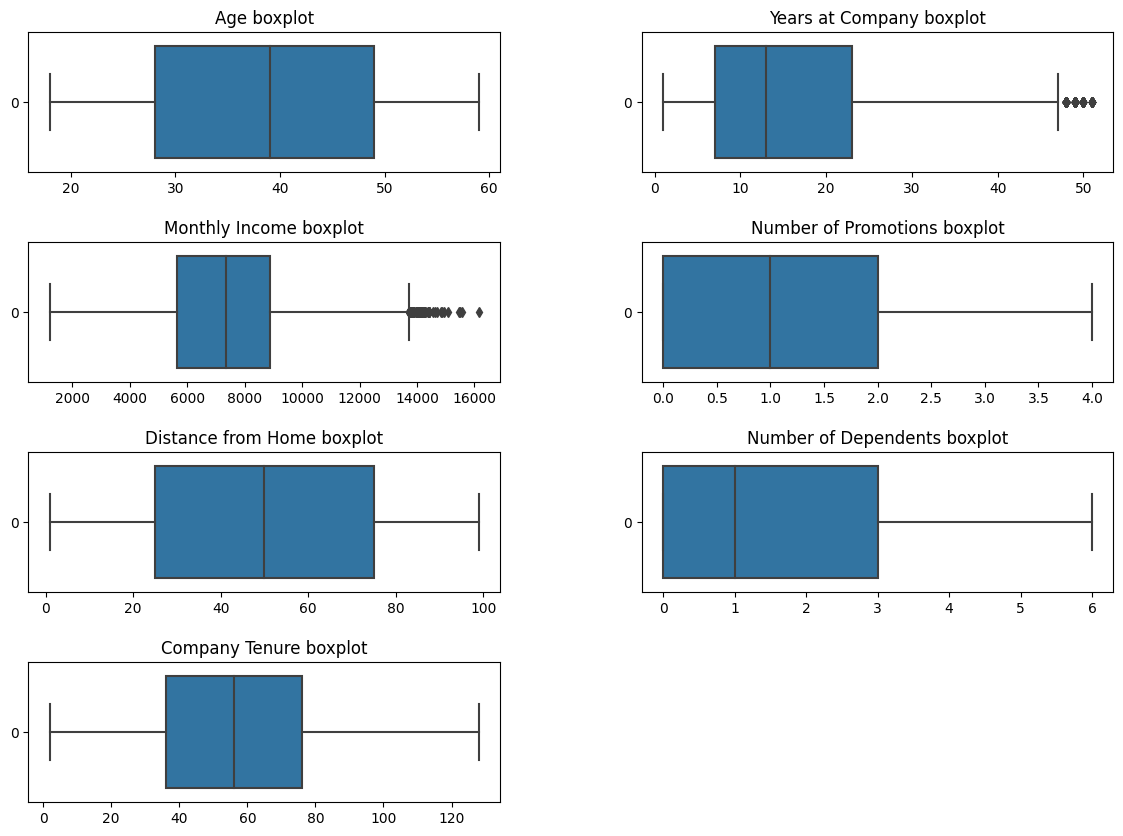

In [9]:
# Check for outlier
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [10]:
# Remove outliers
for col in num_cols[1:3]:
    Q1 = np.quantile(df[col], .25)
    Q3 = np.quantile(df[col], .75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    upper_outliers = df[df[col] > upper][col].values
    lower_outliers = df[df[col] < lower][col].values    
    df[col].replace(upper_outliers, upper, inplace=True)
    df[col].replace(lower_outliers, lower, inplace=True)

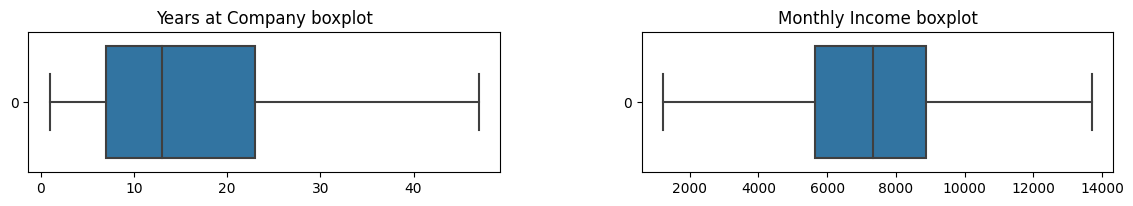

In [11]:
# Check
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols[1:3]):
    plt.subplot(4, 2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

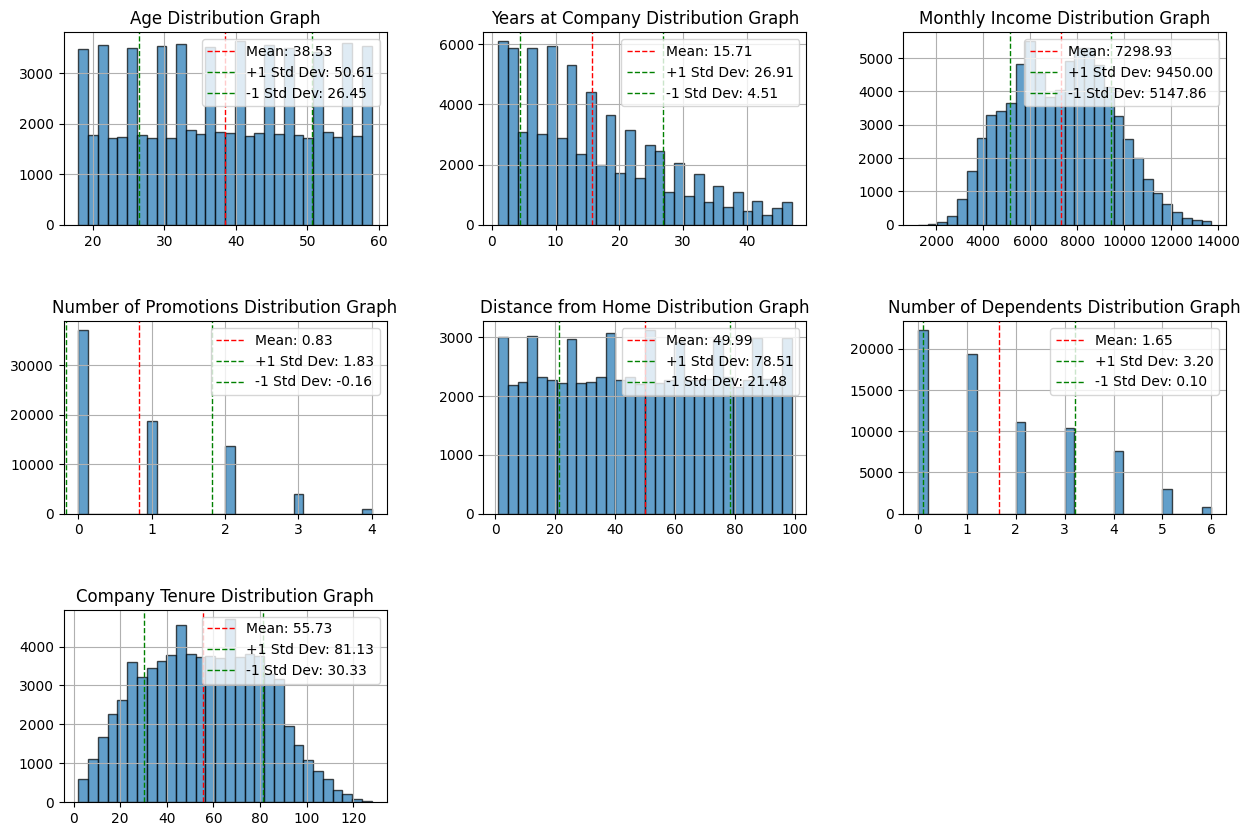

In [12]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    plt.hist(df[col], edgecolor="black", alpha=0.7, bins=30)
    
    mean = df[col].mean()
    std_dev = df[col].std()
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
    plt.axvline(mean + std_dev, color='g', linestyle='dashed', linewidth=1, label=f'+1 Std Dev: {mean + std_dev:.2f}')
    plt.axvline(mean - std_dev, color='g', linestyle='dashed', linewidth=1, label=f'-1 Std Dev: {mean - std_dev:.2f}')
    
    plt.title(f"{col} Distribution Graph")
    plt.legend()
    plt.grid(True)

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

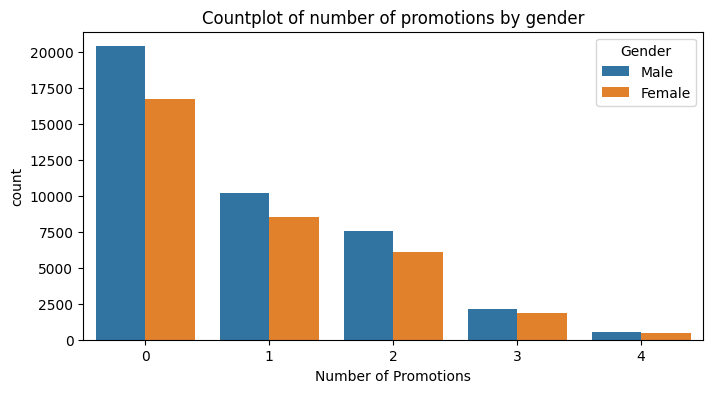

In [13]:
plt.figure(figsize=(8,4))
plt.title("Countplot of number of promotions by gender")
sns.countplot(df, x='Number of Promotions', hue='Gender')
plt.show()

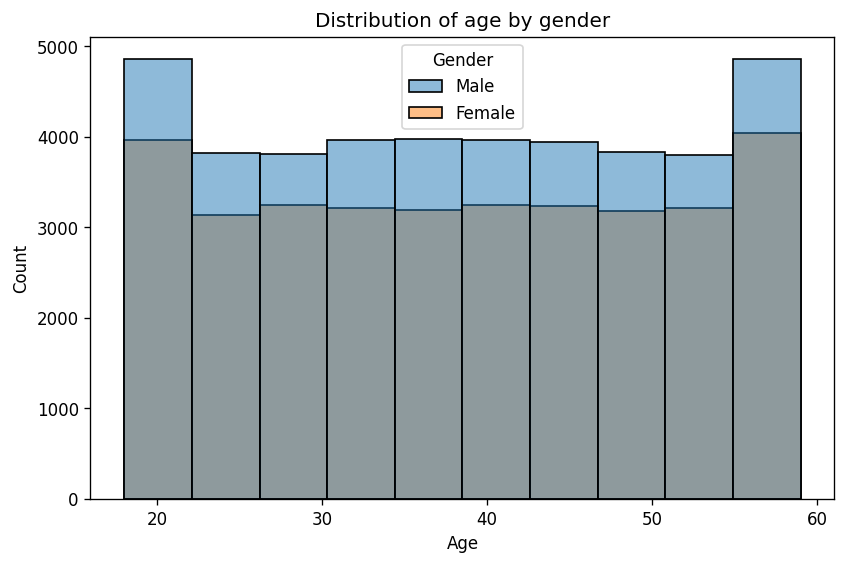

In [14]:
plt.figure(figsize=(8, 5), dpi=120)
plt.title("Distribution of age by gender")
sns.histplot(df, x='Age', hue='Gender', bins=10)
plt.show()

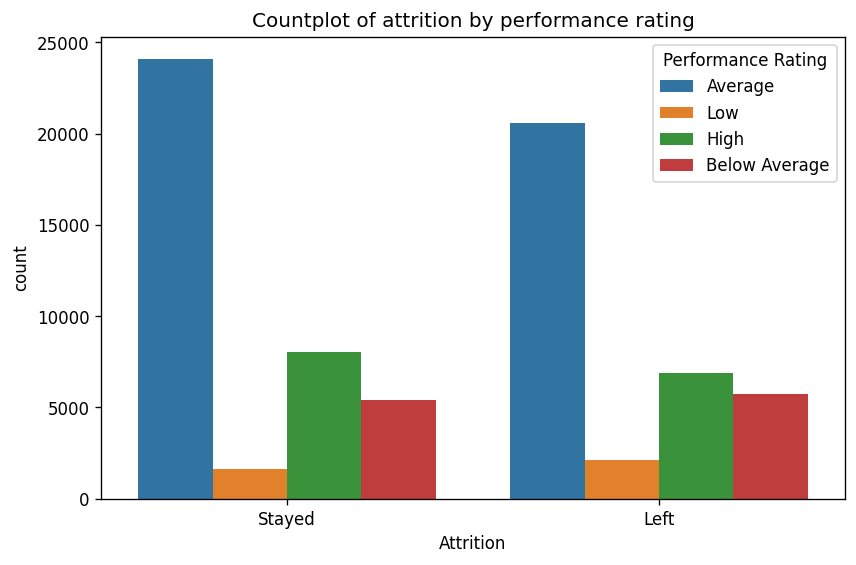

In [15]:
plt.figure(figsize=(8, 5), dpi=120)
plt.title("Countplot of attrition by performance rating")
sns.countplot(df, x='Attrition', hue='Performance Rating')
plt.show()

In [16]:
# Encode target
label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition']) 

In [17]:
# Separate features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [18]:
# Encode categorical columns
cat_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [19]:
# Split the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Build the model**

In [21]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype = torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype = torch.float32).view(-1,1)
y_test_tensor = torch.tensor(y_test.values, dtype = torch.float32).view(-1,1)

In [22]:
# Create Dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [23]:
# Define the model
class AttritionNet(nn.Module):
    def __init__(self, input_dim):
        super(AttritionNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)
        self.layer2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)
        self.layer3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        self.output = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.layer2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.layer3(x)
        x = self.relu3(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

model = AttritionNet(X_train_tensor.shape[1])
crition = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [24]:
# Train the model
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(x_batch)
        loss = crition(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/20, Loss: 0.5227
Epoch 2/20, Loss: 0.5045
Epoch 3/20, Loss: 0.4995
Epoch 4/20, Loss: 0.4977
Epoch 5/20, Loss: 0.4973
Epoch 6/20, Loss: 0.4928
Epoch 7/20, Loss: 0.4915
Epoch 8/20, Loss: 0.4922
Epoch 9/20, Loss: 0.4899
Epoch 10/20, Loss: 0.4913
Epoch 11/20, Loss: 0.4886
Epoch 12/20, Loss: 0.4890
Epoch 13/20, Loss: 0.4888
Epoch 14/20, Loss: 0.4883
Epoch 15/20, Loss: 0.4870
Epoch 16/20, Loss: 0.4870
Epoch 17/20, Loss: 0.4852
Epoch 18/20, Loss: 0.4858
Epoch 19/20, Loss: 0.4849
Epoch 20/20, Loss: 0.4843


# **Evaluate the Model**

In [25]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_label = (y_pred > 0.5).float()

In [26]:
# Metrics
accuracy = accuracy_score(y_test_tensor,  y_pred_label)
precision = precision_score(y_test_tensor,  y_pred_label)
recall = recall_score(y_test_tensor, y_pred_label)
f1 = f1_score(y_test_tensor, y_pred_label)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Model Evaluation:
Accuracy: 0.7542
Precision: 0.7534
Recall: 0.7891
F1-Score: 0.7708


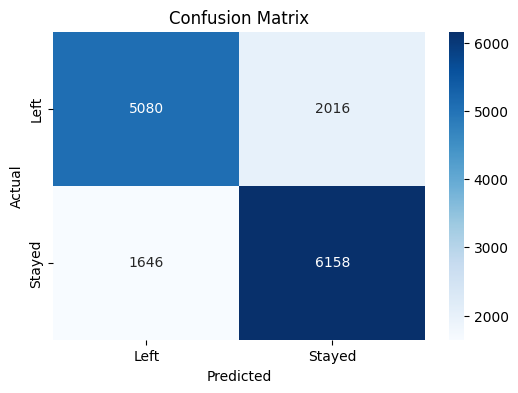

In [27]:
# Confusion matrix
cm = confusion_matrix(y_test_tensor, y_pred_label)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Left', 'Stayed'], yticklabels=['Left', 'Stayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()